<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cambiar carpeta raíz para llamar la imagen.
%cd '/content/drive/MyDrive/lena_hd.jpg'

[Errno 20] Not a directory: '/content/drive/MyDrive/lena_hd.jpg'
/content


In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

import skimage.io
import skimage.filters
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage import data
from skimage import filters
from skimage import restoration

# Smoothing edges in an image: Gaussian filter

Applying a Gaussian filter reduces the high frequency components of an image. That is why it is called a low pass filter.

It is often used to remove Gaussian (random) noise from the image. The `skimage.filters` module has a function called gaussian() that employs this feature on images.

A parameter called `sigma` is needed which determines how much noise will be removed. Larger sigma values ​​can remove more noise, but will also remove more detail from the image.

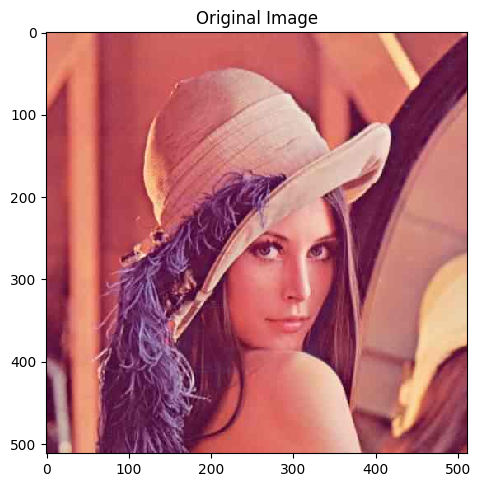

In [ ]:
#Loading the image
lena_hd = skimage.io.imread('/content/drive/MyDrive/lena_hd.jpg')
#Displaying the image
skimage.io.imshow(lena_hd)
plt.title('Original Image');

Let's apply a Gaussian filter to Lena's image:

<ipython-input-6-a5862342aeaf>:1: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gauss_blurred = skimage.filters.gaussian(lena_hd,


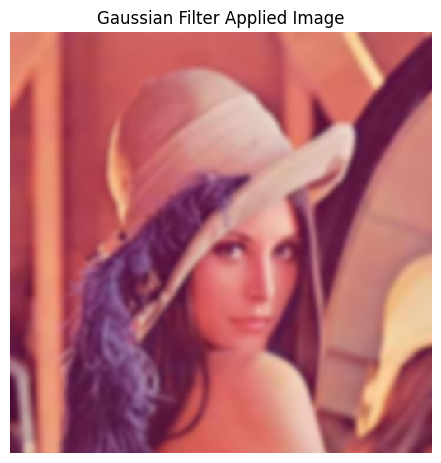

In [ ]:
gauss_blurred = skimage.filters.gaussian(lena_hd,
                                         sigma=(3,3),
                                         truncate=3.5,
                                         multichannel=True)
skimage.io.imshow(gauss_blurred)
plt.title('Gaussian Filter Applied Image')
plt.axis('off');

We observe that the sharpness of the image is reduced, the colors mix more and the high frequencies are effectively lost.

# Effect of other filters

Next, we'll look at how different `skimage` filters affect a low-resolution image.

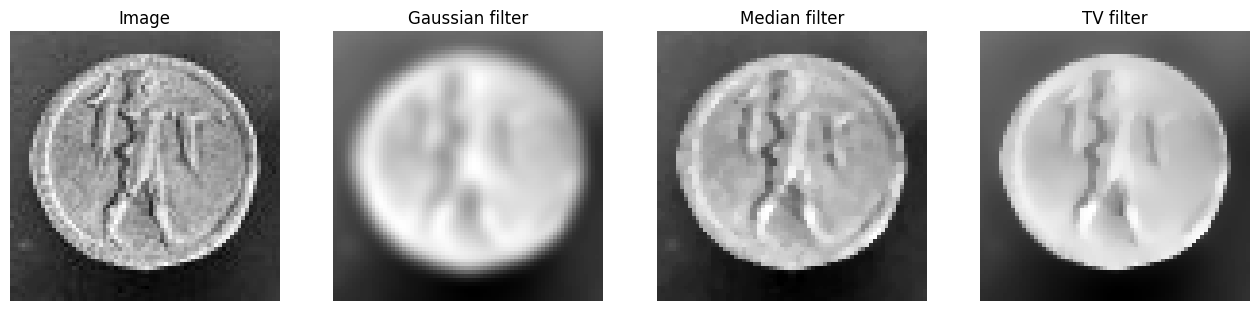

In [ ]:
coins = data.coins()
gaussian_filter_coins = filters.gaussian(coins, sigma=2)
med_filter_coins = filters.median(coins, np.ones((3, 3)))
tv_filter_coins = restoration.denoise_tv_chambolle(coins, weight=0.1)

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Image')
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('Median filter')
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap='gray',
           interpolation='nearest')
plt.axis('off')
plt.title('TV filter')
plt.show()

# Adding noise to an image

We can add noise to an image using `skimage`. Here, we will add random noise to Lena's image using Gaussian, Salt & Pepper, and Poisson distributions.

In [ ]:
#Adding noise to an image:
lena_hd=skimage.io.imread('/content/drive/MyDrive/lena_hd.jpg')

#Add Gaussian noise:
g_noised_image=random_noise(lena_hd,mode='gaussian')
#Add salt&pepper noise:
sp_noised_image=random_noise(lena_hd, mode='s&p', amount=0.09)
#Add Poisson noise:
poisson_noised_image=random_noise(lena_hd,mode='poisson')
#Plot all noised images with the original image:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,30), sharex=True, sharey=True, squeeze=True)
ax = ax.ravel()
ax[0].imshow(lena_hd)
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image)
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(sp_noised_image)
ax[2].set_title('Noise Added Image (Salt & Pepper)')
ax[3].imshow(poisson_noised_image)
ax[3].set_title('Noise Added Image (Poisson)')
fig.tight_layout()
for a in ax:
    a.axis('off')

# Removing noise from an image

We learned how to add noise to an image. Let's learn how to get rid of it as well. The Gaussian smoothing filter mentioned above can remove noise from an image, but it also blurs the edges.

Here, we'll use two techniques to remove noise from an image: **Total Variation (TV)** and **Bilateral**.

* The TV filter has the ability to remove noise from the image without blurring its edges, but this comes at the expense of contrast loss.
* The Bilateral filter is also great at reducing noise while preserving edges, but it can produce cartoon-like images.

Next, we'll use the Gaussian noise-added image from above and apply TV and Bilateral filters to it.

In [ ]:
#Remove random noise by using Total Variation:
denoised_image_tv=denoise_tv_chambolle(g_noised_image,multichannel=True)
#Remove random noise by using Bilateral:
denoised_image_bilateral=denoise_bilateral(g_noised_image,multichannel=True)
#Plot original, noised, and denoised images:
fig, ax = plt.subplots(2,2, figsize=(30, 30), sharey=True)
ax = ax.ravel()
ax[0].imshow(lena_hd)
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image)
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(denoised_image_tv)
ax[2].set_title('Denoised Image (TV chambolle)')
ax[3].imshow(denoised_image_bilateral)
ax[3].set_title('Denoised Image (Bilateral)')
fig.tight_layout()
for a in ax:
    a.axis('off')

# Filtering an undersampled image

Now let's consider a real image. It will be easier to see some of the filtering we're doing if we scale the image down a bit.

We can split the image using the `step` argument to downsample it (don't scale images using this method; for real work use `skimage.transform.rescale`):

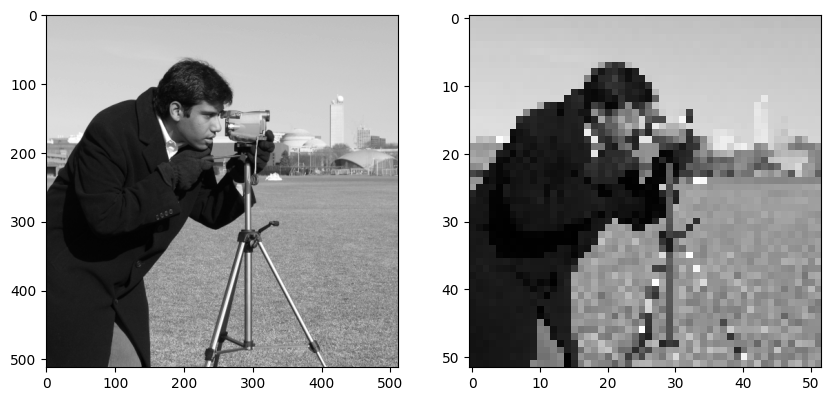

In [ ]:
from skimage import data

image = data.camera()
pixelated = image[::10, ::10]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image, cmap='gray')
ax1.imshow(pixelated, cmap='gray');

Here we use a step of 10, which gives us every tenth column and every tenth row of the original image. You can see the very pixelated result on the right.Here we use a step of 10, which gives us every tenth column and every tenth row of the original image. You can see the very pixelated result on the right.

In [ ]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    '''
    Función que nos permite utilizar el patrón de trazar varias imágenes una al
    lado de la otra con bastante frecuencia.
    '''
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

## Median filter on a real image

Now we can apply the filter to this reduced image:

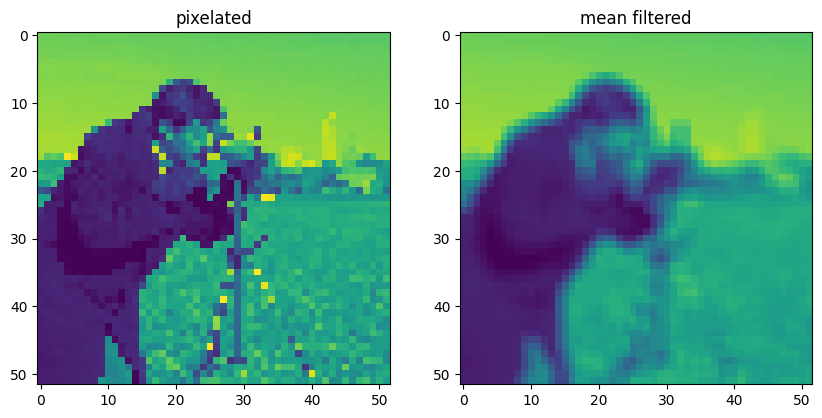

In [ ]:
import scipy.ndimage as ndi

mean_kernel = np.full((3, 3), 1/9)

filtered = ndi.correlate(pixelated, mean_kernel)
imshow_all(pixelated, filtered, titles=['pixelated', 'mean filtered'])

Comparing the filtered image to the pixelated image, we can see that this filtered result is smoother: sharp edges (which are simply boundaries between dark and bright pixels) are softened because dark pixels reduce the intensity of neighboring pixels, and bright pixels do the opposite.

# Filtros esenciales

## gaussian filter

The classic image filter is the Gaussian filter. It is similar to the mean filter, in that it tends to smooth images. The Gaussian filter, however, does not weight all values ​​in the neighborhood equally. Instead, pixels closer to the center are given more weight than those further away.

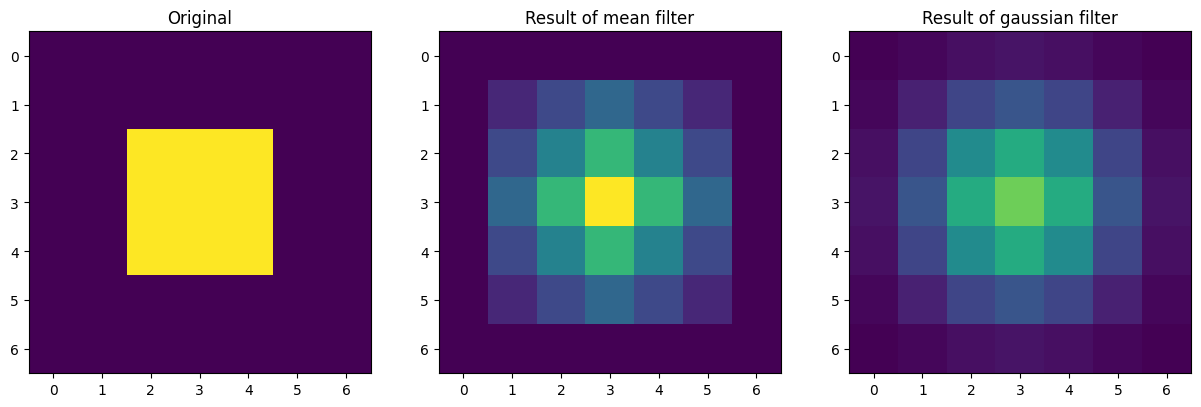

In [ ]:
# Rename module so we don't shadow the builtin function
from skimage import filters

bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1

smooth_mean = ndi.correlate(bright_square, mean_kernel)
sigma = 1
smooth = filters.gaussian(bright_square, sigma)
imshow_all(bright_square, smooth_mean, smooth,
           titles=['Original', 'Result of mean filter', 'Result of gaussian filter'])

For the Gaussian filter, `sigma`, the standard deviation, defines the size of the neighborhood.

For a real image, we get the following:

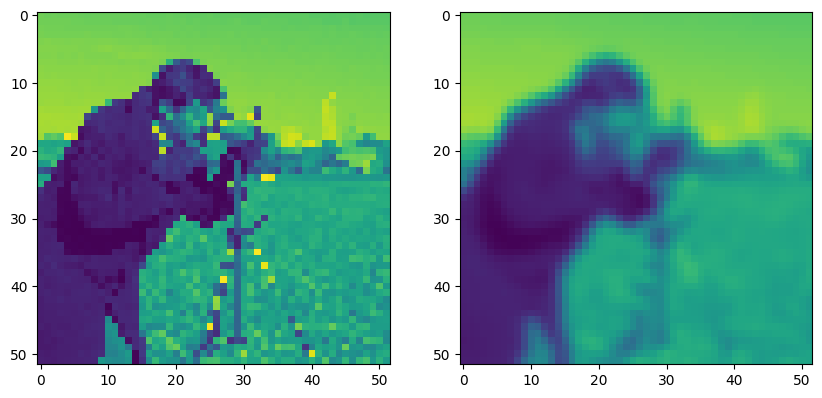

In [ ]:
from skimage import img_as_float
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.
pixelated_float = img_as_float(pixelated)
# Aplicar el filtro gausiano con un sigma de 1 y guardarlo en la variable 'smooth'.
smooth =filters.gaussian(pixelated_float,sigma=1)
imshow_all(pixelated_float, smooth)

This doesn't look drastically different than the mean filter, but the Gaussian filter is usually preferred because of the distance-dependent weighting and because it doesn't have sharp transitions.

For a more detailed image and a larger filter, you may see artifacts in the mean filter since it doesn't take distance into account:

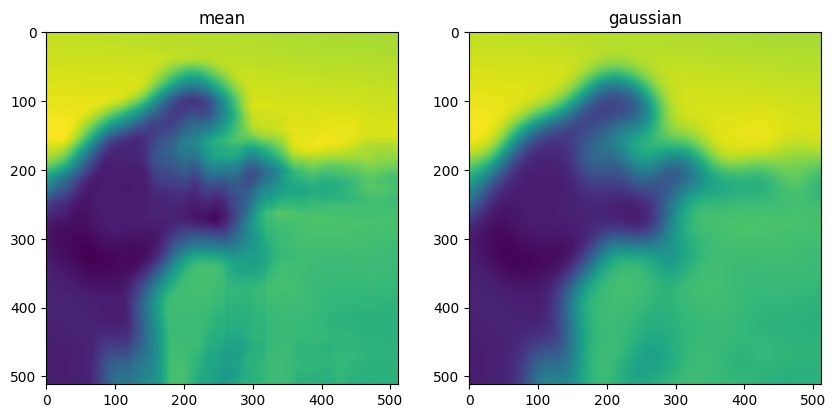

In [ ]:
size = 20
structuring_element = np.ones((3*size, 3*size))
smooth_mean = filters.rank.mean(image, structuring_element)
smooth_gaussian = filters.gaussian(image, size)
titles = ['mean', 'gaussian']
imshow_all(smooth_mean, smooth_gaussian, titles=titles)

(Above, the size of the structuring element used for the mean filter and the standard deviation of the Gaussian filter have been adjusted to produce a roughly equal amount of smoothing in the two results.)

By the way, for reference, let's take a look at what the Gaussian filter actually looks like. Technically, the kernel value at a pixel that is `r` rows and `c` columns from the center is:

$k_{r,c}=\frac{1}{2\pi \sigma ^{2}}\mathrm{exp}\left ( -\frac{r^{2}+c^{2}}{2\sigma ^{2}} \right )$

In practical terms, this value is quite close to zero for values ​​more than $4\sigma$ from the center, so practical Gaussian filters truncate at approximately $4\sigma$:

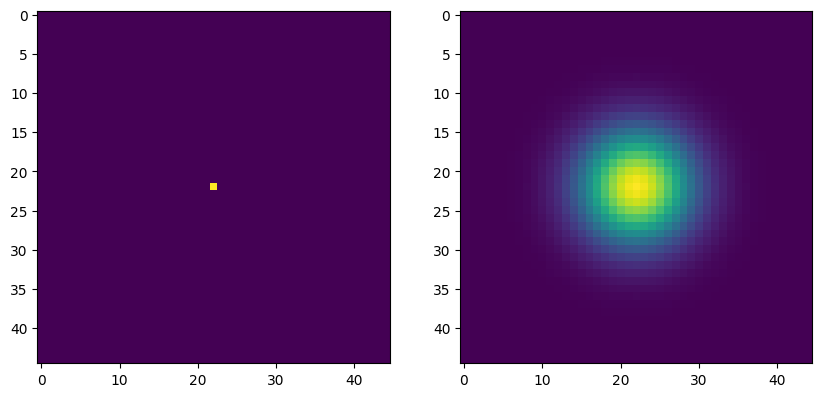

In [ ]:
sidelen = 45
sigma = (sidelen - 1) // 2 // 4
spot = np.zeros((sidelen, sidelen), dtype=float)
spot[sidelen // 2, sidelen // 2] = 1
kernel = filters.gaussian(spot, sigma=sigma)

imshow_all(spot, kernel / np.max(kernel))

# Referencias

[1] [Filtros de Skimage](hthttps://scikit-image.org/docs/stable/api/skimage.filters.htmltps://)

[2] [Filtro Gaussiano de Skimage](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussianhttps://)